# Asset Management Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ffn 
import os
import yfinance as yf
import pandas as pd
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta

sns.set(style='darkgrid')
sns.mpl.rc('figure', figsize=(7, 5))
sns.mpl.rc('font', size = 12)

pd.set_option('display.max_columns', 100)

## Investment Univers

We have to find 5 - 8 titles to use.

To choose the title, we will use a fundamental stock criterion. I will define them here for educational purposes.

1- **Earnings per share (EPS)**:  EPS measures a company's profitability by showing how much profit is allocated to each outstanding share.

\begin{equation}
EPS = \frac{Net Income - PreferredDividends}{Outstanding Shares}
\end{equation}

2- **Price to Earnings (P/E) ratio**: The P/E ratio is a valuation ratio of a company's current share price compared to its per-share earnings.

\begin{equation}
P/E = \frac{Price per Share}{Earnings per Share}
\end{equation}

3- **Price to Book (P/B) ratio**: The P/B ratio is a valuation ratio that compares a company's stock price to its book value.

\begin{equation}
P/B = \frac{Price per Share}{Book Value per Share}
\end{equation}

Book Value is the total value of the company's assets that shareholders would theoretically receive if a company were liquid minus the liabilities.

4- **Enterprise Value to EBITDA (EV/EBITDA) ratio**: is used to measure a company's total valuation relative to its earnings before interest, taxes, depreciation, and amortization.

\begin{equation}
EV/EBITDA = \frac{Enterprise Value}{EBITDA}
\end{equation}

EBITDA shows how much money your business is making before paying for taxes, interest, or depreciation. It helps compare companies without worrying about their loans or tax tricks. EBIDTA = Revenue - Basic Costs

5- **Return on Equity (ROE)**: ROE measures a corporation's profitability by revealing how much profit a company generates with the money shareholders have invested.

\begin{equation}
ROE = \frac{Net Income}{Shareholder's Equity}
\end{equation}

6- **Return on Invested Capital (ROIC)**: ROIC measures how effectively a company uses the money invested in its operations to generate profit.

\begin{equation}
ROIC = \frac{Net Income - dividends}{Total Capital Invested} \times 100
\end{equation}

Total Capital Invested = Total Debt + Shareholder's Equity (Money invested by shareholders)

7- **Dividend Yield**: The dividend yield is the financial ratio that measures the quantum of cash dividends paid out to shareholders relative to the market value per share.

\begin{equation}
Dividend Yield = \frac{Annual Dividends per Share}{Price per Share} \times 100
\end{equation}

8- **Debt to Equity (D/E) ratio**: D/E Ratio measures a company's financial leverage by comparing total debt to shareholders' equity.

\begin{equation}
D/E = \frac{Total Debt}{Shareholder's Equity}
\end{equation}


| Metric | Definition | Ideal Range |
| --- | --- | --- |
| EPS | Profit per outstanding share | Higher is better|
| P/E Ratio | Stock price vs. earning | 	<20 (Varies by sector)|
| P/B Ratio | Stock price vs. book value | <3 (Depends on industry)|
| EV/EBITDA | Enterprise value relative to EBITDA | <10|
| ROE (%) | Profitability from shareholders’ equity | >15%|
| ROIC (%) | Efficiency of capital usage | >10%|
| Dividend Yield | 	Dividend payout relative to stock price | 	>2%|
| D/E Ratio | Financial leverage (Debt vs. Equity) | 	<1.5|


In [2]:
industries = {
    "Technology": ["ASML", "SAP", "IFX.DE", "NVDA", "AMD", "MSFT", "GOOGL", "AAPL", "U", "SNOW", "CRWD", "PLTR", "MDB"],
    "Healthcare": ["SAN.PA", "NVO", "SRT.DE", "JNJ", "PFE", "MRNA", "AZN.L", "GSK.L", "VRTX", "REGN", "BNTX", "ILMN", "EXAS"],
    "Renewable Energy": ["ENR.DE", "ENEL.MI", "ORSTED.CO", "NEE", "VWS.CO", "BEP", "PLUG", "RUN", "FCEL", "ENPH", "SEDG", "SHLS", "FSLR"],
    "Consumer Staples": ['CENCOSUD.SN', 'FALABELLA.SN', "ULVR.L", "NESN.SW", "BN.PA", "KO", "PG", "PEP", "CL", "KHC", "TWNK", "CELH", "OTLY", "BYND", "LANC"],
    "Utilities": ["IBE.MC", "ENGI.PA", "DUK", "SO", "D", "AEP", "NG.L", "CEG", "NEP", "AQN", "CWEN", "SPWR"],
    "Financials": ['BCH', "CS.PA", 'BNP.PA', "ALV.DE", "JPM", "BAC", "GS", "MS", "HSBA.L", "SOFI", "AFRM", "UPST", "LC", "ALLY"],
    "Luxury & Consumer Discretionary": ["MC.PA", "RMS.PA", "OR.PA", "NKE", "ADS.DE", "RACE", "CFR.SW", "BRBY.L", "DECK", "ONON", "FIGS", "CROX", "SKX"],
    'Mining' : ['SQM', 'LIT', 'LAC', 'ALB', 'LTHM', 'GALXF', 'LTHU'],
    'Biotechnology' : ['AMGN', 'GILD', 'BMY', 'MRK', 'ABBV', 'LLY', 'PFE', 'NVO', 'AZN', 'REGN', 'VRTX', 'BIIB', 'SGEN'],
}

tickers = [ticker for tickers in industries.values() for ticker in tickers]

stock_data = []

for industry, tickers in industries.items():
    for ticker in tickers:

        try:
            stock = yf.Ticker(ticker)
            info = stock.info
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
        
        try:
            stock_data.append({
                "Ticker": ticker,
                "Industry": industry,
                "EPS": info.get("trailingEps"),
                "P/E Ratio": info.get("trailingPE"),
                "P/B Ratio": info.get("priceToBook"),
                "EV/EBITDA": info.get("enterpriseToEbitda"),
                "ROE (%)": info.get("returnOnEquity", 0) * 100 if info.get("returnOnEquity") else None,
                "Dividend Yield (%)": info.get("dividendYield", 0) * 100 if info.get("dividendYield") else 0,
                "Debt-to-Equity": info.get("debtToEquity")
            })
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")

# Convert to DataFrame
df = pd.DataFrame(stock_data)
df

Error fetching data for NEP: list index out of range


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SPWR?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SPWR&crumb=C9tuHIqRYAv


Error fetching data for SPWR: 'NoneType' object has no attribute 'update'


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/LTHM?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=LTHM&crumb=C9tuHIqRYAv


Error fetching data for LTHM: 'NoneType' object has no attribute 'update'
Error fetching data for GALXF: list index out of range


,Ticker,Industry,EPS,P/E Ratio,P/B Ratio,EV/EBITDA,ROE (%),Dividend Yield (%),Debt-to-Equity
0,ASML,Technology,20.82,33.475983,14.835146,27.272,47.427000,109.0,27.410
1,SAP,Technology,2.88,89.184030,6.594182,34.502,7.062000,90.0,22.164
2,IFX.DE,Technology,1.07,31.906540,2.605311,11.134,8.035000,100.0,29.279
3,NVDA,Technology,2.94,39.343536,35.689600,33.500,119.177010,3.0,12.946
4,AMD,Technology,1.00,98.255300,2.768379,31.168,2.893000,0.0,4.032
...,...,...,...,...,...,...,...,...,...
108,AZN,Biotechnology,2.25,34.199997,2.925410,8.094,17.593999,205.0,74.527
109,REGN,Biotechnology,38.34,17.713093,2.482472,14.633,15.951000,51.0,10.012
110,VRTX,Biotechnology,-2.08,NaN,7.873170,25.730,-3.152000,0.0,10.661
111,BIIB,Biotechnology,11.17,12.501343,1.217968,8.299,10.358000,0.0,40.181


In [3]:
min_index = df.sort_values(
    by=["Industry", "P/E Ratio"], ascending=[True, True]
    ).groupby(
        "Industry"
    )['P/E Ratio'].idxmin()
    
min_row = df.loc[min_index]  
min_row

,Ticker,Industry,EPS,P/E Ratio,P/B Ratio,EV/EBITDA,ROE (%),Dividend Yield (%),Debt-to-Equity
111,BIIB,Biotechnology,11.17,12.501343,1.217968,8.299,10.358000,0.0,40.181
48,KHC,Consumer Staples,2.26,13.453540,0.738721,8.576,5.545000,528.0,41.460
68,BNP.PA,Financials,9.57,7.707419,0.718194,NaN,9.267000,650.0,NaN
22,REGN,Healthcare,38.34,17.718048,2.483167,14.633,15.951000,51.0,10.012
91,CROX,Luxury & Consumer Discretionary,15.88,6.207179,3.033763,6.475,57.761000,0.0,92.677
94,LIT,Mining,NaN,25.378477,NaN,NaN,NaN,93.0,NaN
38,FSLR,Renewable Energy,12.03,11.196177,1.807556,7.424,17.621000,0.0,9.010
6,GOOGL,Technology,8.04,20.268658,6.121253,15.209,32.908002,48.0,8.655
55,ENGI.PA,Utilities,1.65,10.512121,1.378776,6.165,12.886000,860.0,126.485


We will use the companies with the lowest P/E ratio. This is an arbitrary decision, just to continue with the homework.

In [4]:
portfolio_tickers = min_row['Ticker'].tolist()

data = pd.DataFrame()

for ticker_symbol in portfolio_tickers:
    ticker = yf.Ticker(ticker_symbol)
    ticker_data = ticker.history(period="15y")
    ticker_data.index = ticker_data.index.normalize().tz_localize(None)
    data[ticker_symbol] = ticker_data['Close']

In [5]:
data = data.dropna()
data.head()

,BIIB,KHC,BNP.PA,REGN,CROX,LIT,FSLR,GOOGL,ENGI.PA
Date,,,,,,,,,
2015-07-06,404.630005,48.088295,29.051031,511.582581,14.59,19.194937,44.189999,27.151194,9.392390
2015-07-07,408.059998,49.188995,28.229309,516.945679,14.72,18.724644,45.119999,27.370642,9.271533
2015-07-08,397.679993,49.696503,28.469679,508.646362,14.30,18.062754,43.270000,26.956121,9.380881
2015-07-09,399.290009,49.301037,29.280220,508.376709,14.44,18.202095,43.650002,27.102922,9.628352
2015-07-10,388.230011,50.955383,30.459707,525.334900,14.59,18.846575,44.029999,27.673195,9.927620


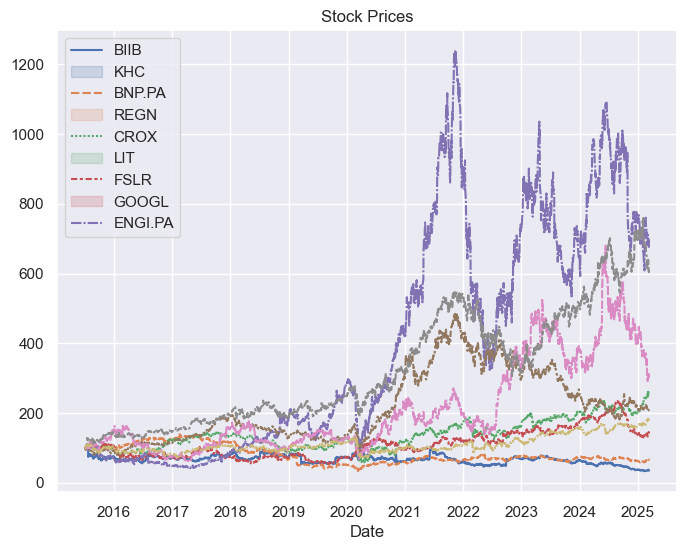

In [6]:
plt.figure(figsize=(8, 6))
plt.title("Stock Prices")
sns.lineplot(data=data.rebase())
plt.legend(data.columns)
plt.show()

## Dynamic Benchmark

The benchmark for the dynamic portfolio will be the SX5E which the ticker is `^STOXX50E`.

In [7]:
ticker = yf.Ticker('^STOXX50E')
ticker_data = ticker.history(period="15y")
benchmark = ticker_data['Close']
benchmark.index = benchmark.index.normalize().tz_localize(None)
benchmark = benchmark.dropna()
benchmark = benchmark.loc[data.index[0]:data.index[-1]]

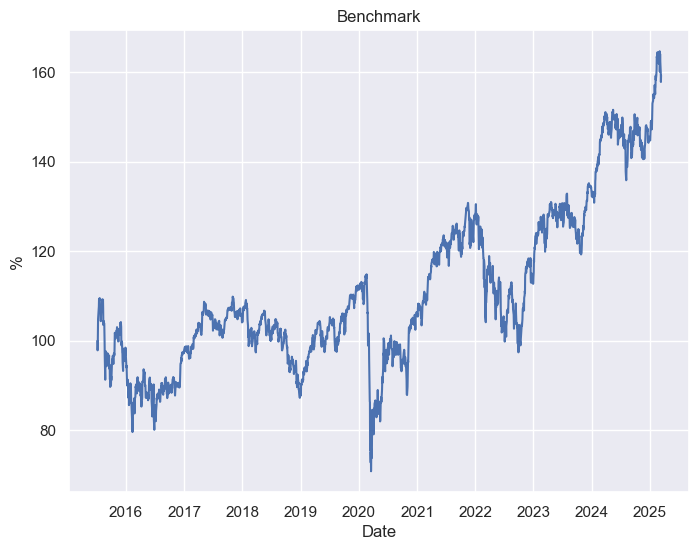

In [8]:
plt.figure(figsize=(8, 6))
plt.title("Benchmark")
sns.lineplot(data=benchmark / benchmark.iloc[0] * 100) 
plt.ylabel("%")
plt.show()

to_returns does $ \frac{P_{t} - P_{t-1}}{P_{t-1}} $

In [9]:
returns_benchmark = benchmark.to_returns().dropna()

In [10]:
def create_monthly_table(return_series, num_of_components):
    return_series.rename('weighted rets',inplace=True)
    return_series = (return_series/ float(num_of_components))
    returns_df_m = pd.DataFrame((return_series + 1).resample('ME').prod() - 1)
    returns_df_m['Month'] = returns_df_m.index.month
    monthly_table = returns_df_m[['weighted rets','Month']].pivot_table(returns_df_m[['weighted rets','Month']], index=returns_df_m.index, columns='Month', aggfunc='sum').resample('YE')
    monthly_table = monthly_table.aggregate('sum')
    monthly_table.columns = monthly_table.columns.droplevel()
    monthly_table.index = monthly_table.index.year
    monthly_table['YTD'] = ((monthly_table + 1).prod(axis=1) - 1)
    monthly_table = monthly_table * 100
    monthly_table.columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','YTD']
    return monthly_table.round(2).fillna("")

In [11]:
create_monthly_table(returns_benchmark, 1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
Date,,,,,,,,,,,,,
2015,0.00,0.00,0.00,0.00,0.00,0.00,7.00,-9.19,-5.17,10.24,2.58,-6.23,-2.29
2016,-7.39,-3.26,2.01,0.77,1.16,-6.49,4.40,1.08,-0.69,1.77,-0.12,7.83,0.08
2017,-1.82,2.75,5.46,1.68,-0.14,-3.17,0.22,-0.81,5.07,2.20,-2.83,-1.85,6.49
2018,3.01,-4.72,-2.25,5.21,-3.67,-0.32,3.83,-3.76,0.19,-5.93,-0.76,-5.88,-14.77
2019,5.79,4.39,1.62,4.86,-6.66,5.89,-0.20,-1.16,4.16,0.98,2.75,1.21,25.51
2020,-2.87,-8.55,-16.30,5.06,4.18,6.03,-1.85,3.09,-2.41,-7.37,18.06,2.26,-4.72
2021,-2.52,4.45,7.78,1.42,1.63,0.61,0.62,2.62,-3.53,5.00,-4.41,5.98,20.56
2022,-3.05,-6.00,-0.55,-2.55,-0.36,-8.82,7.33,-5.15,-5.66,9.02,9.60,-4.32,-11.90
2023,9.75,1.80,1.81,1.03,-3.24,4.29,1.64,-3.90,-2.85,-2.72,7.91,3.18,19.19


Some definition:

1. CARG (compound annual growth rate)
2. Skew: Measure return asymeetry
3. Kurtosis: Hihg values indicate extreme results
4. VaR (Value at Risk): The maximum loss that can be expected with a certain probability
    1. Formula $ VaR = \mu - Z_{\alpha} \cdot \sigma $
        1. $\mu$ is mean return
        2. $Z_{\alpha}$ Z-score for confidence level (1.65 for 90%)
        3. $\sigma$ is standard deviation or volatility
5. CVaR (Conditional Value at Risk): The average loss that can be expected with a certain probability
6. Sharpe Ratio: Measure the return of an investment compared to its risk
    1. Formula $ Sharpe = \frac{R_p - R_f}{\sigma_p} $
7. Volatility: Measure the dispersion of returns
    1. Formula $ Volatility = \sigma = \sqrt{ \frac{\Sigma (r_t - \bar{r})^2}{n - 1} } $ 

In [12]:
stats_benchmark = benchmark.calc_stats()
stats_benchmark.display()

Stats for Close from 2015-07-06 00:00:00 - 2025-03-12 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
59.26%              0.35  4.92%   -38.27%

Annualized Returns:
mtd     3m     6m      ytd     1y     3y      5y      10y    incep.
------  -----  ------  ------  -----  ------  ------  -----  --------
-1.91%  7.93%  11.33%  10.07%  7.55%  12.75%  16.06%  4.92%  4.92%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.35     0.33       0.42
mean    6.65%    5.55%      5.82%
vol     19.13%   16.97%     13.69%
skew    -0.67    0.06       -0.13
kurt    10.39    1.35       -1.10
best    9.24%    18.06%     25.51%
worst   -12.40%  -16.30%    -14.77%

Drawdowns:
max      avg       # days
-------  ------  --------
-38.27%  -3.59%     62.07

Misc:
---------------  ------
avg. up month    3.94%
avg. down month  -3.67%
up year %        70.00%
12m up %

In [13]:
benchmark.calc_sharpe()

np.float64(6.1592633327487665)

In [14]:
stats_portfolio = data.calc_stats()

df_stats_portfolio = pd.DataFrame({
    asset : stats_portfolio[asset].stats 
    for asset in stats_portfolio.keys()
}).T
df_stats_portfolio.index.name = "Ticker"

stats_portfolio.display()

Stat                 BIIB        KHC         BNP.PA      REGN        CROX        LIT         FSLR        GOOGL       ENGI.PA
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06  2015-07-06
End                  2025-03-12  2025-03-12  2025-03-12  2025-03-12  2025-03-12  2025-03-12  2025-03-12  2025-03-12  2025-03-12
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -65.35%     -36.99%     153.66%     34.78%      598.29%     109.22%     207.85%     515.48%     83.13%
Daily Sharpe         -0.06       -0.04       0.46        0.26        0.64        0.41        0.48        0.80        0.38
Daily Sortino        -0.10       -0.06       0.75        0.45        1.11        0.68        0.85        1.32        0.58

I will continue with the homework now, but we can choose better stocks givent their sharpe ratios.

#### When to use simple returns vs log returns?

- Simple Returns are like saying: “Today, I gained 5% on my investment.” 
- Log Returns are like saying: “If I keep investing, how does this return accumulate over time?”
- For statistical calculations (like correlation & covariance), log returns are the best choice because they make models more mathematically stable.

In [15]:
log_returns = np.log(data / data.shift(1))
log_returns = log_returns.dropna()

# Average returns daily
log_returns.mean()

BIIB      -0.000439
KHC       -0.000191
BNP.PA     0.000385
REGN       0.000124
CROX       0.000805
LIT        0.000306
FSLR       0.000466
GOOGL      0.000752
ENGI.PA    0.000251
dtype: float64

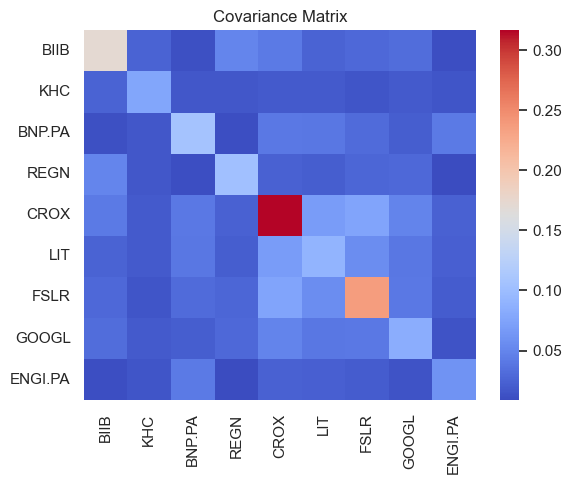

In [16]:
plt.figure(figsize=(6, 5))
plt.title("Covariance Matrix")
sns.heatmap(log_returns.cov() * 252, annot=False, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [17]:
def portfolio_returns (weights, log_returns=log_returns):
    return np.sum(log_returns.mean() * weights) * 252

def portfolio_volatility (weights, log_returns=log_returns):
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

## Portfolio Selection

## Static Portfolio Allocation

### Portfolio Optimization

#### MC simulation for portfolio weights


In [18]:
number_of_assets = len(data.columns)
number_of_assets

9

In [19]:
from collections import namedtuple

Portfolio = namedtuple('Portfolio', ['returns', 'volatility'])

portfolios = [
    Portfolio(
        returns = portfolio_returns( 
                    weights := (w:= np.random.random(number_of_assets)) / np.sum(w)
        ),
        volatility = portfolio_volatility(weights)
    )
    for _ in range(1_000)
]

df_portfolios = pd.DataFrame(portfolios)

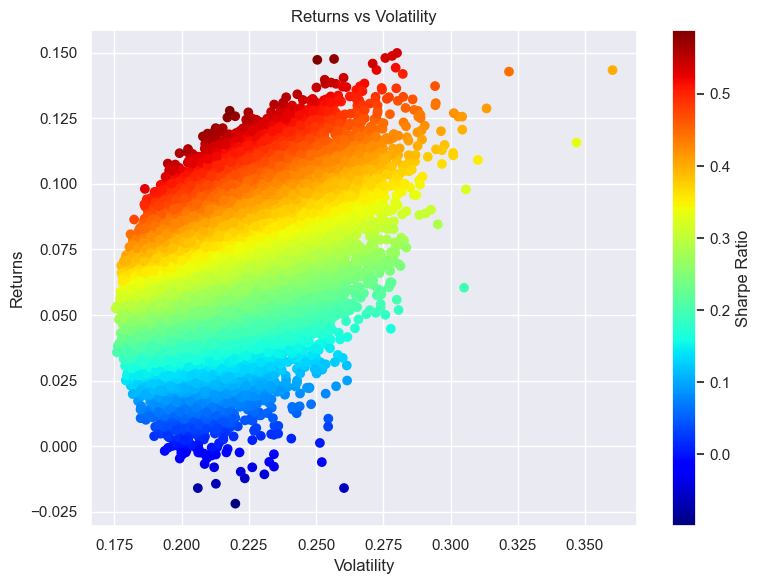

In [20]:
plt.figure(figsize=(8, 6))
plt.title("Returns vs Volatility")
plt.scatter(df_portfolios.volatility, 
            df_portfolios.returns, 
            c=df_portfolios.returns / df_portfolios.volatility,
            marker='o', cmap='jet', 
            alpha=1)
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.colorbar(label="Sharpe Ratio")
plt.tight_layout()
plt.show()


#### Optimization scipy

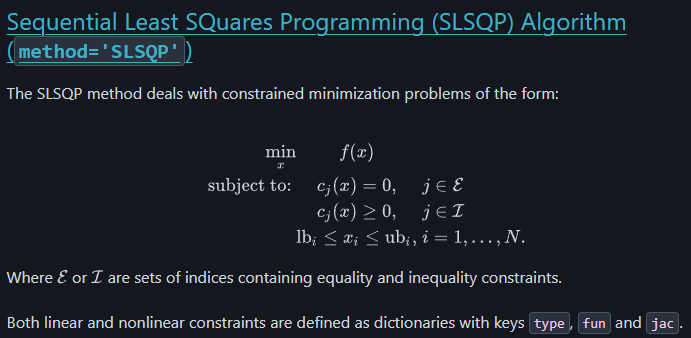

```python
ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([1 - x[0] - 2*x[1],
                                         1 - x[0]**2 - x[1],
                                         1 - x[0]**2 + x[1]]),
             'jac' : lambda x: np.array([[-1.0, -2.0],
                                         [-2*x[0], -1.0],
                                         [-2*x[0], 1.0]])}
eq_cons = {'type': 'eq',
           'fun' : lambda x: np.array([2*x[0] + x[1] - 1]),
           'jac' : lambda x: np.array([2.0, 1.0])}
```

For the bounds, we can define them as tuples with the desired range. For example, if we want to limit the weights between 0 and 1, we can define the bounds as follows:

```python
bounds = ((0, 1), (0, 1))
```


##### We will optimize this portfolio by **minimizing** the **sharpe ratio**.

In [21]:
import scipy.optimize as sco

def min_func_sharpe(weights):
    return -portfolio_returns(weights) / portfolio_volatility(weights)

bounds = tuple((0, 1) for asset in range(number_of_assets))

# We want the weights to sum up to 1
eq_constraints = {
    'type': 'eq',
    'fun': lambda x: np.sum(x) - 1
} 

initial_guess = number_of_assets * [1. / number_of_assets]

opt_sharpe = sco.minimize(
    min_func_sharpe,
    x0 = initial_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=eq_constraints
)
print("Optimal Sharpe", -1 * opt_sharpe['fun'])

Optimal Sharpe 0.6895743576791568


In [22]:
x_sharpe = np.array([ value if value > 1e-6 else 0 for value in opt_sharpe.x ])
x_sharpe /= np.sum(x_sharpe)
x_sharpe

array([0.        , 0.        , 0.11317472, 0.        , 0.09846699,
       0.        , 0.00426625, 0.70010803, 0.08398401])

##### We will optimize this portfolio by **minimizing** the **volatility $\sigma$**.

In [23]:
opt_vol = sco.minimize(
    portfolio_volatility,
    x0 = initial_guess,
    method='SLSQP',
    bounds=bounds,
    constraints=eq_constraints
)
x_vol = np.array([ value if value > 1e-5 else 0 for value in opt_vol.x ])
x_vol /= np.sum(x_vol)

print("Min vol returns", portfolio_returns(x_vol))
print("Min vol volatility", portfolio_volatility(x_vol))
print("Min vol sharpe", portfolio_returns(x_vol) / portfolio_volatility(x_vol))

Min vol returns 0.04737128871641999
Min vol volatility 0.1738264068487184
Min vol sharpe 0.2725206691849033


##### Efficient Frontier

I will fix the risk and we will get the best return.

In [24]:
def fun_returns (weights):
    return -portfolio_returns(weights)

expected_volatilities = np.linspace(0.17, 0.3, 50)
optimal_returns = []

for expected_vol in expected_volatilities:
    constraints = ({
        'type': 'eq',
        'fun': lambda x: np.sum(x) - 1
    }, {
        'type': 'eq',
        'fun': lambda x: portfolio_volatility(x) - expected_vol
    })
    
    initial_guess = number_of_assets * [1. / number_of_assets]
    bounds = tuple((0, 1) for asset in range(number_of_assets))
    
    opt = sco.minimize(
        fun_returns,
        x0 = initial_guess,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    
    optimal_returns.append(-1 * opt['fun'])

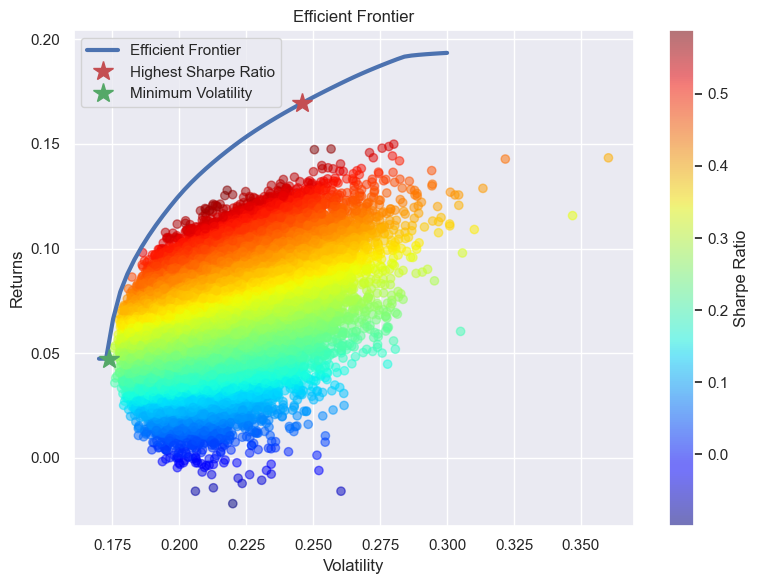

In [25]:
plt.figure(figsize=(8, 6))
plt.title("Efficient Frontier")
plt.scatter(df_portfolios.volatility, 
            df_portfolios.returns, 
            c=df_portfolios.returns / df_portfolios.volatility,
            marker='o', cmap='jet', 
            alpha=0.5)
plt.plot(expected_volatilities, optimal_returns, lw=3, label="Efficient Frontier")
plt.plot(portfolio_volatility(x_sharpe), portfolio_returns(x_sharpe), 
         'r*', markersize=15.0, label="Highest Sharpe Ratio")
plt.plot(portfolio_volatility(x_vol), portfolio_returns(x_vol), 
         'g*', markersize=15.0, label="Minimum Volatility")
plt.legend()
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.colorbar(label="Sharpe Ratio")
plt.tight_layout()
plt.show()

## Dynamic Portfolio Allocation

```python
opt_sharpe = sco.minimize(
    min_func_sharpe,
    x0=initial_guess,
    args=(returns,),
    method='SLSQP',
    bounds=bounds,
    constraints=eq_constraints
)
```

The args arguments will call the objective function as:

```min_fun_shapr(x, *args)```

**Conclusion (Practical & Professional stance for your project):**

- It is justified and consistent with your professor’s structuration class methodology to perform Markowitz optimization using log returns.

- Report Sharpe Ratios and realized performance (for your final project comparison with SX5E and Carmignac Patrimoine) using simple returns for clarity, investor friendliness, and alignment with standard market practice.

In [131]:
def rebalance_portfolio(prices, rebalance_period=6, history_window=12):
    """ Perform dynamic portfolio optimization every 6 months based on 1 year history. """
    
    import scipy.optimize as sco
    import numpy as np
    import pandas as pd
    from dateutil.relativedelta import relativedelta

    rebalancing_dates = prices.resample(f'{rebalance_period}ME').last().index
    today = pd.Timestamp.today()
    rebalancing_dates = rebalancing_dates[rebalancing_dates < today]

    optimized_weights = []
    portfolio_values = [1]  # Initial portfolio value of 1

    returns = prices.to_returns().dropna()
    log_returns = prices.to_log_returns().dropna()

    # Optimization parameters
    bounds = tuple((0, 1) for _ in range(len(prices.columns)))
    eq_constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    initial_guess = len(prices.columns) * [1. / len(prices.columns)]

    def portfolio_log_returns(weights, log_returns):
        return np.sum(log_returns.mean() * weights) * 252

    def portfolio_log_volatility(weights, log_returns):
        return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    def min_func_sharpe(weights, log_returns):
        return -portfolio_log_returns(weights, log_returns) / portfolio_log_volatility(weights, log_returns)

    number_periods_unused = int(np.ceil(history_window / rebalance_period))

    optimized_weights = []
    portfolio_values = [1]

    print("Starting Dynamic Portfolio Optimization:")
    print("----------------------------------------")
    
    portfolio_returns = []
    for period in range(number_periods_unused, len(rebalancing_dates)):

        start_date = rebalancing_dates[period] - relativedelta(months=history_window)
        end_date = rebalancing_dates[period]

        historical_log_returns = log_returns.loc[start_date:end_date]

        opt_sharpe = sco.minimize(
            min_func_sharpe,
            x0=initial_guess,
            args=(historical_log_returns,),
            method='SLSQP',
            bounds=bounds,
            constraints=eq_constraints
        )

        weights = np.array([value if value > 1e-6 else 0 for value in opt_sharpe.x])
        weights /= np.sum(weights)

        optimized_weights.append(weights)

        # Get returns for the next 6 months with these weights
        next_period_start = end_date + pd.DateOffset(days=1)
        next_period_end = end_date + pd.DateOffset(months=rebalance_period)
        future_returns = returns.loc[next_period_start:next_period_end]

        # Compute daily portfolio returns and append
        period_portfolio_returns = future_returns.dot(weights)
        
        portfolio_values.append((1 + period_portfolio_returns).cumprod().iloc[-1])
        
        portfolio_returns.append(period_portfolio_returns)


    portfolio_return_series = pd.concat(portfolio_returns)
    
    # Final volatility from the concatenated return series
    annualized_volatility = portfolio_return_series.std() * np.sqrt(252)
    
    # Annualized return
    cumulative_return = (1 + portfolio_return_series).prod() - 1
    number_of_years = (portfolio_return_series.index[-1] - portfolio_return_series.index[0]).days / 252
    annualized_return = (1 + cumulative_return) ** (1 / number_of_years) - 1

    # Sharpe ratio calculation (assuming risk-free rate is zero)
    sharpe_ratio = annualized_return / annualized_volatility
    
    print("Total Return:", round(cumulative_return * 100, 2), "%")
    print("Annualized Return: ", round(annualized_return * 100, 2), "%")
    print("Annualized Volatility: ", round(annualized_volatility * 100, 2), "%")
    print("Sharpe Ratio: ", round(sharpe_ratio, 4))

    optimized_weights = np.array(optimized_weights)
    
    results = pd.DataFrame({
        "Date": rebalancing_dates[number_periods_unused:],
        "Portfolio Value": portfolio_values[1:],
        **{f"Weights_{col}": optimized_weights[:, i] for i, col in enumerate(prices.columns)}
    })

    summary = {
        'Final Return': annualized_return,
        'Annualized Volatility': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio
    }
    return results, summary

In [132]:
results, summary = rebalance_portfolio(data, rebalance_period=6, history_window=12)
results

Starting Dynamic Portfolio Optimization:
----------------------------------------
Total Return: 44.84 %
Annualized Return:  3.01 %
Annualized Volatility:  25.23 %
Sharpe Ratio:  0.1194


,Date,Portfolio Value,Weights_BIIB,Weights_KHC,Weights_BNP.PA,Weights_REGN,Weights_CROX,Weights_LIT,Weights_FSLR,Weights_GOOGL,Weights_ENGI.PA
0,2016-07-31,1.065892,0.000000,0.024381,0.000000,0.000000,0.000000,0.529815,0.000000,0.445804,0.000000
1,2017-01-31,1.144648,0.000000,0.119219,0.000000,0.000000,0.000000,0.880781,0.000000,0.000000,0.000000
2,2017-07-31,1.161010,0.000000,0.000000,0.323222,0.023680,0.000000,0.372081,0.000000,0.281017,0.000000
3,2018-01-31,1.002573,0.029642,0.000000,0.000000,0.000000,0.082203,0.238281,0.056674,0.376503,0.216698
4,2018-07-31,1.224165,0.056977,0.000000,0.000000,0.000000,0.439597,0.000000,0.000000,0.346492,0.156934
5,2019-01-31,0.881107,0.000000,0.000000,0.000000,0.021296,0.608377,0.000000,0.000000,0.000000,0.370327
6,2019-07-31,1.071860,0.000000,0.000000,0.000000,0.000000,0.226675,0.000000,0.392994,0.000000,0.380331
7,2020-01-31,0.904679,0.000000,0.000000,0.209926,0.000000,0.094700,0.000000,0.000000,0.373767,0.321608
8,2020-07-31,0.904361,0.000000,0.000000,0.000000,0.861934,0.075438,0.062628,0.000000,0.000000,0.000000
9,2021-01-31,1.198151,0.000000,0.000000,0.000000,0.262432,0.000000,0.627068,0.110500,0.000000,0.000000
